In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm,probplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ted = pd.read_csv("TedWilliams.csv")
ken = pd.read_csv("Griffey.csv")
rog = pd.read_csv("RogersHornsby.csv")
barry = pd.read_csv("BarryBonds.csv")

In [9]:
ted1 = ted.drop(10)
ted1

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,RAR,WAR,Awards
0,1939,20.0,149,677,565,131,185,44,11,31,...,0.436,0.609,1.045,160,344,10,2,74,6.80,MVP-4
1,1940,21.0,144,661,561,134,193,43,14,23,...,0.442,0.594,1.036,162,333,13,3,70,6.50,ASMVP-14
2,1941,22.0,143,606,456,135,185,33,3,37,...,0.553,0.735,1.287,235,335,10,3,110,10.40,ASMVP-2
3,1942,23.0,150,671,522,141,186,34,5,36,...,0.499,0.648,1.147,216,338,12,4,102,10.40,ASMVP-2
4,1946,27.0,150,672,514,142,176,37,8,38,...,0.497,0.667,1.164,215,343,12,2,101,10.60,ASMVP-1
5,1947,28.0,156,693,528,125,181,40,9,32,...,0.499,0.634,1.133,205,335,10,2,91,9.50,ASMVP-2
6,1948,29.0,137,638,509,124,188,44,3,25,...,0.497,0.615,1.112,189,313,10,3,86,8.30,ASMVP-3
7,1949,30.0,155,730,566,150,194,39,3,43,...,0.490,0.650,1.141,191,368,22,2,94,9.10,ASMVP-1
8,1950,31.0,89,416,334,82,106,24,1,28,...,0.452,0.647,1.099,168,216,12,0,41,3.90,ASMVP-21
9,1951,32.0,148,675,531,109,169,28,4,30,...,0.464,0.556,1.019,164,295,10,0,73,7.10,ASMVP-13


In [19]:
ken

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,BA,OBP,SLG,OPS,OPS+,TB,HBP,RAR,WAR,Awards
0,1989,19.0,127,506,455,61,120,23,0,16,...,0.264,0.329,0.420,0.748,108,191,2,32,3.3,RoY-3
1,1990,20.0,155,666,597,91,179,28,7,22,...,0.300,0.366,0.481,0.847,136,287,2,52,5.2,ASMVP-19GG
2,1991,21.0,154,633,548,76,179,42,1,22,...,0.327,0.399,0.527,0.926,155,289,1,70,7.1,ASMVP-9GGSS
3,1992,22.0,142,617,565,83,174,39,4,27,...,0.308,0.361,0.535,0.896,149,302,5,57,5.8,ASMVP-17GG
4,1993,23.0,156,691,582,113,180,38,3,45,...,0.309,0.408,0.617,1.025,171,359,6,91,8.8,ASMVP-5GGSS
5,1994,24.0,111,493,433,94,140,24,4,40,...,0.323,0.402,0.674,1.076,171,292,2,76,6.9,ASMVP-2GGSS
6,1995,25.0,72,314,260,52,67,7,0,17,...,0.258,0.379,0.481,0.860,122,125,0,34,3.3,ASGG
7,1996,26.0,140,638,545,125,165,26,2,49,...,0.303,0.392,0.628,1.020,154,342,7,104,9.7,ASMVP-4GGSS
8,1997,27.0,157,704,608,125,185,34,3,56,...,0.304,0.382,0.646,1.028,165,393,8,95,9.1,ASMVP-1GGSS
9,1998,28.0,161,720,633,120,180,33,3,56,...,0.284,0.365,0.611,0.977,150,387,7,70,6.6,ASMVP-4GGSS


In [20]:
rog

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,BA,OBP,SLG,OPS,OPS+,TB,HBP,RAR,WAR,Awards
0,1915,19.0,18,61,57,5,14,2,0,0,...,0.246,0.271,0.281,0.552,66,16,0,-3,-0.4,NaN
1,1916,20.0,139,550,495,63,155,17,15,6,...,0.313,0.369,0.444,0.814,151,220,4,42,4.9,NaN
2,1917,21.0,145,589,523,86,171,24,17,8,...,0.327,0.385,0.484,0.868,169,253,4,85,9.9,NaN
3,1918,22.0,115,466,416,51,117,19,11,5,...,0.281,0.349,0.416,0.764,137,173,3,48,5.4,NaN
4,1919,23.0,138,577,512,68,163,15,9,8,...,0.318,0.384,0.430,0.814,150,220,7,59,6.7,NaN
5,1920,24.0,149,660,589,96,218,44,20,9,...,0.370,0.431,0.559,0.990,185,329,3,88,9.6,NaN
6,1921,25.0,154,674,592,131,235,44,18,21,...,0.397,0.458,0.639,1.097,191,378,7,109,10.8,NaN
7,1922,26.0,154,704,623,141,250,46,14,42,...,0.401,0.459,0.722,1.181,207,450,1,108,10.0,NaN
8,1923,27.0,107,487,424,89,163,32,10,17,...,0.384,0.459,0.627,1.086,188,266,3,70,6.7,NaN
9,1924,28.0,143,642,536,121,227,43,14,25,...,0.424,0.507,0.696,1.203,222,373,2,125,12.2,MVP-2


In [21]:
barry

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,RAR,WAR,Awards
0,1986,21.0,113.0,484,413.0,72.0,92.0,26.0,3.0,16.0,...,0.330,0.416,0.746,103.0,172.0,4.0,2.0,34,3.5,RoY-6
1,1987,22.0,150.0,611,551.0,99.0,144.0,34.0,9.0,25.0,...,0.329,0.492,0.821,114.0,271.0,4.0,3.0,57,5.8,NaN
2,1988,23.0,144.0,614,538.0,97.0,152.0,30.0,5.0,24.0,...,0.368,0.491,0.859,148.0,264.0,3.0,2.0,58,6.3,NaN
3,1989,24.0,159.0,679,580.0,96.0,144.0,34.0,6.0,19.0,...,0.351,0.426,0.777,126.0,247.0,9.0,1.0,74,8.0,NaN
4,1990,25.0,151.0,621,519.0,104.0,156.0,32.0,3.0,33.0,...,0.406,0.565,0.970,170.0,293.0,8.0,3.0,92,9.7,ASMVP-1GGSS
5,1991,26.0,153.0,634,510.0,95.0,149.0,28.0,5.0,25.0,...,0.410,0.514,0.924,160.0,262.0,8.0,4.0,75,8.0,MVP-2GGSS
6,1992,27.0,140.0,612,473.0,109.0,147.0,36.0,5.0,34.0,...,0.456,0.624,1.080,204.0,295.0,9.0,5.0,83,9.0,ASMVP-1GGSS
7,1993,28.0,159.0,674,539.0,129.0,181.0,38.0,4.0,46.0,...,0.458,0.677,1.136,206.0,365.0,11.0,2.0,99,9.9,ASMVP-1GGSS
8,1994,29.0,112.0,474,391.0,89.0,122.0,18.0,1.0,37.0,...,0.426,0.647,1.073,183.0,253.0,3.0,6.0,64,6.2,ASMVP-4GGSS
9,1995,30.0,144.0,635,506.0,109.0,149.0,30.0,7.0,33.0,...,0.431,0.577,1.009,170.0,292.0,12.0,5.0,77,7.5,ASMVP-12


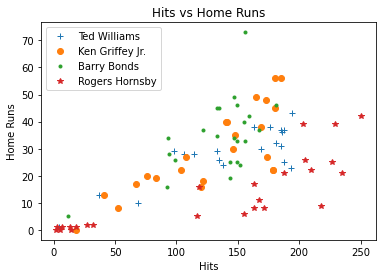

In [10]:
plt.plot(ted["H"], ted["HR"], "+", label = "Ted Williams")
plt.plot(ken["H"], ken["HR"], "o", label = "Ken Griffey Jr.")
plt.plot(barry["H"], barry["HR"], ".", label = "Barry Bonds")
plt.plot(rog["H"], rog["HR"], "*", label = "Rogers Hornsby")
plt.xlabel("Hits")
plt.ylabel("Home Runs")
plt.title("Hits vs Home Runs")
plt.legend()

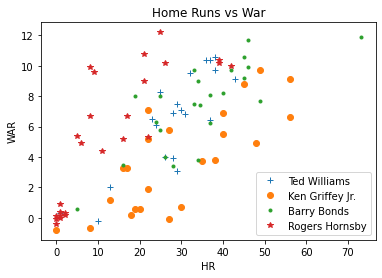

In [11]:
plt.plot(ted["HR"], ted["WAR"], "+", label = "Ted Williams")
plt.plot(ken["HR"], ken["WAR"], "o", label = "Ken Griffey Jr.")
plt.plot(barry["HR"], barry["WAR"], ".", label = "Barry Bonds")
plt.plot(rog["HR"], rog["WAR"], "*", label = "Rogers Hornsby")
plt.xlabel("HR")
plt.ylabel("WAR")
plt.title("Home Runs vs War")
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dde1554f0>,
      dtype=object)

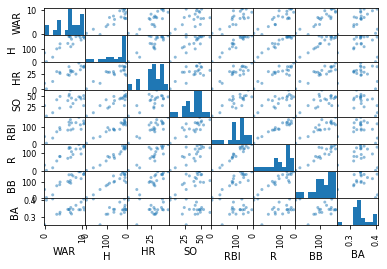

In [12]:
pd.plotting.scatter_matrix(ted[["WAR", "H", "HR", "SO", "RBI", "R", "BB", "BA"]])

In [13]:
round(rog.describe(),3)

,Age,G,PA,AB,R,H,2B,3B,HR,RBI,...,SO,BA,OBP,SLG,OPS,OPS+,TB,HBP,RAR,WAR
count,24.000,25.000,25.000,25.00,25.000,25.000,25.000,25.000,25.000,25.000,...,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000,25.000
mean,30.292,96.840,406.440,350.36,67.680,125.600,23.200,7.240,12.920,67.920,...,29.120,0.337,0.420,0.530,0.950,155.080,202.000,2.040,52.960,5.296
std,6.785,60.093,279.374,240.66,53.612,91.731,17.879,6.729,13.304,51.389,...,20.673,0.057,0.062,0.139,0.191,46.202,154.447,2.031,45.317,4.427
min,19.000,2.000,6.000,5.00,1.000,2.000,0.000,0.000,0.000,2.000,...,0.000,0.208,0.271,0.281,0.552,61.000,2.000,0.000,-3.000,-0.400
25%,24.750,24.000,70.000,58.00,9.000,18.000,3.000,0.000,1.000,11.000,...,6.000,0.313,0.385,0.430,0.817,124.000,24.000,0.000,4.000,0.300
50%,30.500,134.000,550.000,486.00,68.000,163.000,24.000,8.000,8.000,71.000,...,34.000,0.331,0.431,0.522,0.990,163.000,220.000,2.000,52.000,5.300
75%,36.250,145.000,642.000,536.00,113.000,205.000,41.000,12.000,21.000,94.000,...,43.000,0.384,0.459,0.632,1.097,188.000,333.000,3.000,94.000,9.900
max,41.000,162.000,712.000,623.00,156.000,250.000,47.000,20.000,42.000,152.000,...,65.000,0.424,0.507,0.778,1.245,222.000,450.000,7.000,125.000,12.200


In [14]:
round(ted.describe(),3)

,Age,G,PA,AB,R,H,2B,3B,HR,RBI,...,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,RAR,WAR
count,19.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.00,...,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.000
mean,31.368,122.700,524.200,412.550,96.250,142.100,28.100,3.800,27.900,98.45,...,0.347,0.481,0.656,1.136,196.750,261.450,10.550,2.100,65.050,6.421
std,6.576,40.468,197.393,155.353,43.643,55.525,12.452,3.888,10.295,39.31,...,0.036,0.039,0.107,0.136,37.705,98.784,4.968,1.447,32.741,3.295
min,20.000,6.000,12.000,10.000,2.000,4.000,0.000,0.000,1.000,3.00,...,0.254,0.372,0.419,0.791,114.000,9.000,0.000,0.000,-1.000,-0.200
25%,27.500,110.500,416.750,330.500,75.500,112.000,22.500,1.000,24.750,82.75,...,0.328,0.456,0.608,1.074,171.000,222.750,9.500,1.000,40.500,3.975
50%,32.000,136.500,576.500,438.000,102.500,166.000,28.000,3.000,29.000,105.00,...,0.344,0.493,0.640,1.124,191.000,301.000,10.000,2.000,71.000,6.850
75%,36.500,149.250,672.750,528.750,131.750,185.250,37.500,5.000,36.250,126.25,...,0.359,0.499,0.676,1.173,215.250,335.750,12.250,3.000,91.750,9.200
max,41.000,162.000,730.000,566.000,150.000,194.000,44.000,14.000,43.000,159.00,...,0.407,0.553,0.901,1.410,273.000,368.000,22.000,5.000,110.000,10.600


In [15]:
round(barry.describe(),3)

,Age,G,PA,AB,R,H,2B,3B,HR,RBI,...,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,RAR,WAR
count,22.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,...,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000
mean,31.500,135.726,573.000,447.587,101.226,133.409,27.317,3.500,34.635,90.726,...,0.298,0.441,0.616,1.057,181.091,271.635,7.500,4.817,75.000,7.400
std,6.494,31.005,137.004,114.599,27.081,35.778,8.767,2.407,13.716,30.447,...,0.035,0.070,0.115,0.179,43.210,76.686,3.811,3.171,29.729,2.866
min,21.000,14.000,52.000,42.000,8.000,12.000,1.000,0.000,5.000,10.000,...,0.223,0.329,0.416,0.746,103.000,28.000,0.000,0.000,6.000,0.600
25%,26.250,130.000,521.500,390.500,93.000,127.500,24.500,2.000,25.500,71.500,...,0.280,0.405,0.555,0.984,158.000,250.000,4.500,2.500,57.500,6.000
50%,31.500,144.000,612.000,476.000,104.000,147.000,28.000,3.000,34.000,101.000,...,0.298,0.440,0.615,1.047,174.000,292.000,7.500,4.000,77.000,8.000
75%,36.750,153.000,649.500,525.500,121.000,153.500,32.000,5.000,43.500,112.000,...,0.312,0.460,0.672,1.104,196.000,314.500,10.000,8.000,93.500,9.450
max,42.000,159.000,697.000,580.000,129.000,181.000,44.000,9.000,73.000,137.000,...,0.370,0.609,0.863,1.422,268.000,411.000,15.000,10.000,127.000,11.900


In [16]:
round(ken.describe(),3)

,Age,G,PA,AB,R,H,2B,3B,HR,RBI,...,SO,BA,OBP,SLG,OPS,OPS+,TB,HBP,RAR,WAR
count,22.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,...,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000
mean,29.500,123.174,521.304,451.957,76.652,128.261,24.174,1.739,29.043,84.652,...,82.043,0.276,0.363,0.518,0.882,129.348,243.087,3.739,39.913,3.796
std,6.494,37.604,177.671,154.908,34.064,50.926,10.369,1.815,15.290,39.341,...,26.676,0.034,0.034,0.101,0.131,31.217,102.544,2.684,34.095,3.281
min,19.000,33.000,108.000,98.000,6.000,18.000,2.000,0.000,0.000,7.000,...,17.000,0.184,0.250,0.204,0.454,30.000,20.000,0.000,-7.000,-0.800
25%,24.250,110.000,435.500,375.500,54.500,93.500,19.000,0.000,18.500,60.500,...,69.500,0.256,0.356,0.481,0.824,113.500,175.000,2.000,7.500,0.650
50%,29.500,140.000,575.000,491.000,78.000,141.000,24.000,1.000,27.000,90.000,...,82.000,0.284,0.369,0.533,0.898,136.000,283.000,3.000,39.000,3.700
75%,34.750,154.500,652.000,573.500,100.500,173.500,31.000,3.000,40.000,110.000,...,101.500,0.302,0.383,0.576,0.953,149.500,311.000,6.000,65.000,6.200
max,40.000,162.000,720.000,633.000,125.000,185.000,42.000,7.000,56.000,147.000,...,121.000,0.327,0.408,0.674,1.076,171.000,393.000,9.000,104.000,9.700


Text(0.5, 1.0, 'Home Runs Per Season')

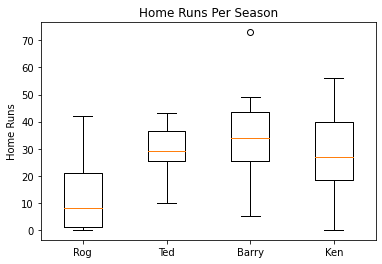

In [19]:
plt.boxplot([rog["HR"], ted1["HR"], barry["HR"], ken["HR"]])
plt.xticks([1,2,3,4], ["Rog", "Ted", "Barry", "Ken"])
plt.ylabel("Home Runs")
plt.title("Home Runs Per Season")

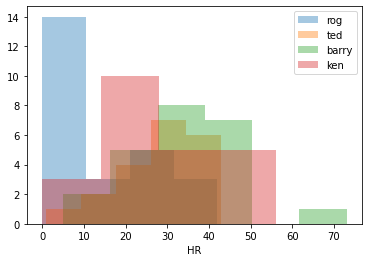

In [26]:
plt.figure()
sns.distplot(rog['HR'],kde=False,label="rog")
sns.distplot(ted['HR'],kde=False,label="ted")
sns.distplot(barry['HR'],kde=False,label="barry")
sns.distplot(ken['HR'],kde=False,label="ken")
plt.legend()